In [195]:
import pickle
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.model_selection import train_test_split
from matplotlib import cm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.naive_bayes import MultinomialNB
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib
import matplotlib.patches as mpatches
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression

# make sure stopwords are downloaded
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
tokenizer = RegexpTokenizer(r'[a-zA-Z0-9]+')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\akams\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\akams\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\akams\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [222]:
df = pd.read_csv('cleaned_data_2.csv', index_col = 0)
df.head()

,Ingredients,Cuisine
0,chicken thighs drumsticks sea salt flakes soft...,1
1,chicken beef short ribs ribs separated piece b...,1
2,unsalted butter softened golden caster sugar e...,1
3,whole chicken jointed bonein chicken pieces us...,1
4,macaroni whole milk bay leaves butter plain fl...,1


In [223]:
def ingredient_tokens(cuis_df):
    ingredients = [i for i in cuis_df['Ingredients']]
    ing_tokes = [tokenizer.tokenize(i) for i in ingredients] 
    return ing_tokes 

In [275]:
# Stemming: change = chang
from nltk.stem import PorterStemmer

def stem_df(ingredient_tokens):
    ps = PorterStemmer()
    
    stemmed_ingredients = []
    for ingredients in ingredient_tokens:
        stemmed = ' '.join([ps.stem(i) for i in ingredients])
        stemmed_ingredients.append(stemmed)
    return stemmed_ingredients
stemmed_ingredients = stem_df(ingredient_tokens(df))

In [224]:
# lemmatezization: changer = change
from nltk.stem import WordNetLemmatizer 

def lem_df(ingredient_tokens):
    lemmatizer = WordNetLemmatizer() 
    lemmatized_ingredients = []
    for ingredients in ingredient_tokens:
        lemmed = ' '.join([lemmatizer.lemmatize(i) for i in ingredients])
        lemmatized_ingredients.append(lemmed)
    return lemmatized_ingredients
lemmatized_ingredients = lem_df(ingredient_tokens(df))

In [226]:
# define features and target
data = df['Ingredients']
target = df['Cuisine']

In [284]:
for i in df['Ingredients']:
    _ingredients.append(i)
_ingredients

['chicken thighs drumsticks sea salt flakes soft dark brown sugar chilli flakes sweet smoked paprika ground cumin sea salt flakes dark brown sugar butter hot chilli sauce maple syrup',
 'chicken beef short ribs ribs separated piece boned pork shoulder rind removed texas barbecue sauce sweet white onions gherkins goodquality flaky sea salt fennel seeds black peppercorns bay leaves cayenne pepper smoked paprika garlic salt soft light brown sugar golden caster sugar wood chips',
 'unsalted butter softened golden caster sugar egg yolks lightly beaten plain flour extra dusting pecans toasted eggs golden caster sugar golden syrup unsalted butter melted sea salt extra sprinkling vanilla extract bourbon whisky double cream maple syrup',
 'whole chicken jointed bonein chicken pieces used legs breasts thighs wings sea salt smoked paprika garlic granules runny honey cider vinegar light brown soft sugar american mustard',
 'macaroni whole milk bay leaves butter plain flour dijon mustard thyme leav

In [285]:
X = _ingredients

y = target

In [276]:
X_stem = stemmed_ingredients

y_stem = target

In [227]:
X_lem = lemmatized_ingredients

y_lem = target

In [228]:
more_words = pickle.load(open("more_words.pickle", 'rb'))

In [286]:
# stemmed
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)
tfidf = TfidfVectorizer(stop_words = more_words, ngram_range=(1, 2))

tfidf_data_train = tfidf.fit_transform(X_train) #fit vectorizor then transform
tfidf_data_test = tfidf.transform(X_test) # only need to transform test data

tfidf_data_train

<720x12868 sparse matrix of type '<class 'numpy.float64'>'
	with 43638 stored elements in Compressed Sparse Row format>

In [277]:
# stemmed
X_train_stem, X_test_stem, y_train_stem, y_test_stem = train_test_split(X_stem, y_stem, test_size=0.20, random_state=1)
tfidf = TfidfVectorizer(stop_words = more_words, ngram_range=(1, 2))

tfidf_data_train_stem = tfidf.fit_transform(X_train_stem) #fit vectorizor then transform
tfidf_data_test_stem = tfidf.transform(X_test_stem) # only need to transform test data

tfidf_data_train_stem

<720x11934 sparse matrix of type '<class 'numpy.float64'>'
	with 43357 stored elements in Compressed Sparse Row format>

In [229]:
# lemmatization
X_train_lem, X_test_lem, y_train_lem, y_test_lem = train_test_split(X_lem, y_lem, test_size=0.20, random_state=1)
tfidf = TfidfVectorizer(stop_words = more_words, ngram_range=(1, 2))

tfidf_data_train_lem = tfidf.fit_transform(X_train_lem) #fit vectorizor then transform
tfidf_data_test_lem = tfidf.transform(X_test_lem) # only need to transform test data

tfidf_data_train_lem

<720x12147 sparse matrix of type '<class 'numpy.float64'>'
	with 43381 stored elements in Compressed Sparse Row format>

In [230]:
def cuisine_df(class_num):
    return df[df['Cuisine'] == class_num]

In [231]:
# use pickled objects to map class to cuisine type
cuisines_dict_map = pickle.load( open( "cuisines_dict_map.pickle", "rb" ) )
cuisines_lst_map = pickle.load( open( "cuisines_lst_map.pickle", "rb" ) )
# cuisines_dict_map

In [232]:
amer_df = cuisine_df(1)
brit_df = cuisine_df(2)
cari_df = cuisine_df(3)
chin_df = cuisine_df(4)
fren_df = cuisine_df(5)
gree_df = cuisine_df(6)
indi_df = cuisine_df(7)
ital_df = cuisine_df(8)
japa_df = cuisine_df(9)
medi_df = cuisine_df(10)
mexi_df = cuisine_df(11)
moro_df = cuisine_df(12)
span_df = cuisine_df(13)
thai_df = cuisine_df(14)
turk_df = cuisine_df(15)
viet_df = cuisine_df(16)
iris_df = cuisine_df(17)
nord_df = cuisine_df(18)
nafr_df = cuisine_df(19)
paki_df = cuisine_df(20)

In [233]:
def cuisine_data(cuis_df):
    return cuis_df['Ingredients']

In [234]:
data_1 = cuisine_data(amer_df)
data_2 = cuisine_data(brit_df)
data_3 = cuisine_data(cari_df)
data_4 = cuisine_data(chin_df)
data_5 = cuisine_data(fren_df)
data_6 = cuisine_data(gree_df)
data_7 = cuisine_data(indi_df)
data_8 = cuisine_data(ital_df)
data_9 = cuisine_data(japa_df)
data_10 = cuisine_data(medi_df)
data_11 = cuisine_data(mexi_df)
data_12 = cuisine_data(moro_df)
data_13 = cuisine_data(span_df)
data_14 = cuisine_data(thai_df)
data_15 = cuisine_data(turk_df)
data_16 = cuisine_data(viet_df)
data_17 = cuisine_data(iris_df)
data_18 = cuisine_data(nord_df)
data_19 = cuisine_data(nafr_df)
data_20 = cuisine_data(paki_df)

In [235]:
def cuisine_vocab(ingredient_tokens):
    total_cuisine_vocab = set()
    for ingredients in ingredient_tokens:
        total_cuisine_vocab.update(ingredients)
    return len(total_cuisine_vocab)

In [236]:
cuisine_vocab(ingredient_tokens(amer_df))

516

In [237]:
def lst_cuisine(cuis_tokens):
    return [ingredient for ingredients in cuis_tokens for ingredient in ingredients]

In [238]:
def cuisine_freqdist(cuis_lst, n):
    f = FreqDist(cuis_lst)
    return f.most_common(n)

In [239]:
from nltk import word_tokenize 
from nltk.util import ngrams

def plus_bigrams(ingredient_tokens):
    ing_bigrams = []
    for i in ingredient_tokens:
        ing_bigrams.append(list(ngrams(i, 2)))
    
    bigram_df = []
    for i in ing_bigrams:
        bigram_df.append(list(map(' '.join, i)))
    
    return [bigram_df_lst for bigram_lst_df in bigram_df for bigram_df_lst in bigram_lst_df]

In [240]:
cuisine_freqdist(plus_bigrams(ingredient_tokens(ital_df)) ,20)

[('olive oil', 33),
 ('garlic cloves', 20),
 ('caster sugar', 13),
 ('red wine', 12),
 ('cloves crushed', 9),
 ('plain flour', 8),
 ('double cream', 8),
 ('vegetarian alternative', 7),
 ('golden caster', 7),
 ('white wine', 6),
 ('parmesan vegetarian', 6),
 ('ball mozzarella', 6),
 ('x cans', 6),
 ('parmesan grated', 6),
 ('rosemary sprigs', 6),
 ('sprigs leaves', 6),
 ('leaves picked', 6),
 ('flour extra', 6),
 ('balsamic vinegar', 6),
 ('egg yolks', 6)]

In [241]:
def wrd_val_counts(cuis_lst, n):
    counts = [x[1] for x in cuisine_freqdist(cuis_lst, n)]
    words = [x[0] for x in cuisine_freqdist(cuis_lst, n)]
    return (words, counts)

In [242]:
wrd_val_counts(plus_bigrams(ingredient_tokens(japa_df)), 20)

(['soy sauce',
  'vegetable oil',
  'spring onions',
  'caster sugar',
  'sesame seeds',
  'sesame oil',
  'garlic cloves',
  'piece ginger',
  'sushi rice',
  'miso paste',
  'wine vinegar',
  'red chilli',
  'curry powder',
  'rice wine',
  'toasted sesame',
  'ginger peeled',
  'oil vegetable',
  'chilli deseeded',
  'rapeseed oil',
  'thumbsized piece'],
 [43, 26, 25, 22, 16, 15, 13, 13, 13, 11, 10, 10, 10, 9, 9, 8, 8, 8, 8, 8])

In [243]:
from matplotlib import cm
from numpy import linspace

def plot_count_fdist(cuisine_type, cuis_df, n, figsize, save):
#     color graph
    start = 0.2
    stop = 0.9
    number_of_lines= n+10
    cm_subsection = linspace(start, stop, number_of_lines) 

    colors = [ cm.RdPu_r(x) for x in cm_subsection ]

    color = colors
    
#     graph dimensions
    new_figure = plt.figure(figsize = figsize)

    ax = new_figure.add_subplot(121)
    
    # Generate plot based on bigram frequency
    ax.bar(wrd_val_counts(plus_bigrams(ingredient_tokens(cuis_df)), n)[0], wrd_val_counts(plus_bigrams(ingredient_tokens(cuis_df)), n)[1], color=color)
    ax.title.set_text(f'{cuisine_type}')
    for ax in new_figure.axes:
#         plt.sca(ax)
        plt.xticks(rotation=60)

    plt.tight_layout(pad=0)
    if save == 'yes':
        plt.savefig(f'{cuisine_type}_fdist_top{n}.png')
        plt.show
    else:
        return plt.show()

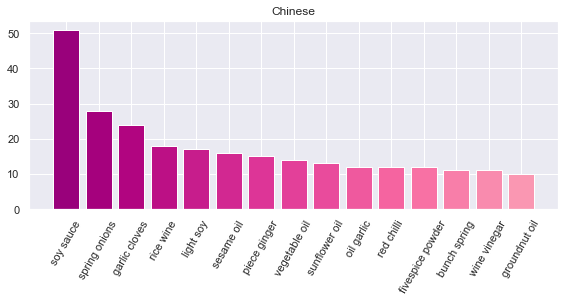

In [348]:
plot_count_fdist('Chinese', chin_df, 15, (15,4), 'no')

In [152]:
def form_dict(cuis_df, n):
    return dict(zip(wrd_val_counts(plus_bigrams(ingredient_tokens(cuis_df)), n)[0], wrd_val_counts(plus_bigrams(ingredient_tokens(cuis_df)), n)[1]))

In [153]:
form_dict(japa_df, 10)

{'soy sauce': 43,
 'vegetable oil': 26,
 'spring onions': 25,
 'caster sugar': 22,
 'thinly sliced': 18,
 'sesame seeds': 16,
 'sesame oil': 15,
 'finely chopped': 14,
 'garlic cloves': 13,
 'piece ginger': 13}

In [174]:
def gen_wordcloud(cuisine_type, dictionary, colormap, figsize, save):
    wordcloud = WordCloud(colormap = colormap).generate_from_frequencies(dictionary)
    # Display the generated image w/ matplotlib:

    plt.figure(figsize = figsize, facecolor='k')
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.tight_layout(pad=0)
    
    if save == 'yes':
        plt.savefig(f'{cuisine_type}_wordcloud.png')
        plt.show
    else:
        return plt.show()

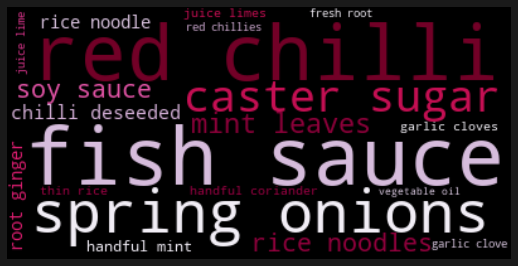

In [272]:
gen_wordcloud("Overall_Cuisines", form_dict(viet_df, 20), 'PuRd', (7,7), 'no')

In [287]:
rf = RandomForestClassifier(n_estimators=100, random_state=0)


rf.fit(tfidf_data_train, y_train) # fit model to TRAINING set

rf_test_preds = rf.predict(tfidf_data_test) #predict on TESTING set


rf_acc_score = accuracy_score(y_test, rf_test_preds)
rf_f1_score = f1_score(y_test, rf_test_preds, average = 'weighted')
print('Random Forest with Normal Features')
print("Testing Accuracy: {:.4}".format(rf_acc_score))
print()
print("F1 Score: {:.4}".format(rf_f1_score))

Random Forest with Normal Features
Testing Accuracy: 0.55

F1 Score: 0.5204


C:\Users\akams\anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [278]:
rf_stem = RandomForestClassifier(n_estimators=100, random_state=0)


rf_stem.fit(tfidf_data_train_stem, y_train_stem) # fit model to TRAINING set

rf_test_preds_stem = rf_stem.predict(tfidf_data_test_stem) #predict on TESTING set


rf_acc_score_stem = accuracy_score(y_test_stem, rf_test_preds_stem)
rf_f1_score_stem = f1_score(y_test_stem, rf_test_preds_stem, average = 'weighted')
print('Random Forest with Stemmed Features')
print("Testing Accuracy: {:.4}".format(rf_acc_score_stem))
print()
print("F1 Score: {:.4}".format(rf_f1_score_stem))

Random Forest with Stemmed Features
Testing Accuracy: 0.55

F1 Score: 0.5212


C:\Users\akams\anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [192]:
rf_lem = RandomForestClassifier(n_estimators=100, random_state=0)


rf_lem.fit(tfidf_data_train_lem, y_train_lem) # fit model to TRAINING set

rf_test_preds_lem = rf_lem.predict(tfidf_data_test_lem) #predict on TESTING set


rf_acc_score_lem = accuracy_score(y_test_lem, rf_test_preds_lem)
rf_f1_score_lem = f1_score(y_test_lem, rf_test_preds_lem, average = 'weighted')
print('Random Forest with Lemmatization Features')
print("Testing Accuracy: {:.4}".format(rf_acc_score_lem))
print()
print("F1 Score: {:.4}".format(rf_f1_score_lem))

Random Forest with Lemmatization Features
Testing Accuracy: 0.5667

F1 Score: 0.5405


C:\Users\akams\anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


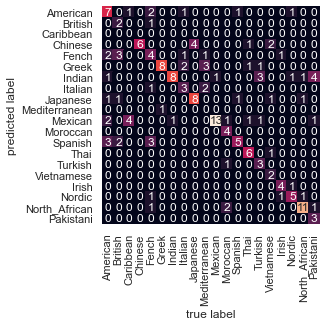

In [194]:
from sklearn.metrics import confusion_matrix
import seaborn as sns; sns.set()


mat = confusion_matrix(y_test_lem, rf_test_preds_lem)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=cuisines_lst_map, yticklabels=cuisines_lst_map)

plt.xlabel('true label')
plt.ylabel('predicted label');

In [ ]:
lems = pd.DataFrame(lemmatized_ingredients)[0]

In [317]:
X = lems
y = target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 42)
names = ['American', 'British', 'Caribbean','Chinese','French','Greek','Indian','Italian','Japanese','Mediterranean','Mexican',
         'Morocca','Spanish','Thai','Turkish','Vietnamese','Irish','Nordic','North_African','Pakistani']

In [311]:
emore_words = ['thinly', 'sliced', 'chopped', 'roughly']

In [318]:
def vectorize(df):
    text = df.values
    cv = CountVectorizer(stop_words= emore_words, ngram_range = (1,2))
    X = cv.fit_transform(text)

    cvdf = pd.DataFrame(X.toarray(), columns = cv.get_feature_names())
    return cvdf.head(), cvdf.columns

In [319]:
cvdf = vectorize(X_train)
cvdf

(   absorbing  absorbing liquid  according  according instruction  \
 0          0                 0          0                      0   
 1          0                 0          0                      0   
 2          0                 0          0                      0   
 3          0                 0          0                      0   
 4          0                 0          0                      0   
 
    according packet  according taste  add  add colour  add extra  african  \
 0                 0                0    0           0          0        0   
 1                 0                0    0           0          0        0   
 2                 0                0    0           0          0        0   
 3                 0                0    0           0          0        0   
 4                 0                0    0           0          0        0   
 
    ...  zest unwaxed  zest wedge  zested  zested ball  zested cut  \
 0  ...             0           0       0   

In [320]:
def tf_idf(df):
    tfv = TfidfVectorizer(stop_words = emore_words, ngram_range = (1,2))
    text_tf = tfv.fit_transform(df)
    return text_tf.data

In [321]:
tf_idf(X_train)

array([0.162506  , 0.162506  , 0.12190364, ..., 0.04005899, 0.03901173,
       0.0772205 ])

In [324]:
# Naieve Bayes
naive = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB()),
              ])
naive.fit(X_train, y_train)

y_pred = naive.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
(classification_report(y_test, y_pred,target_names=names))

accuracy 0.47555555555555556


C:\Users\akams\anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


'               precision    recall  f1-score   support\n\n     American       0.27      0.60      0.37        15\n      British       0.00      0.00      0.00        14\n    Caribbean       0.00      0.00      0.00         5\n      Chinese       0.57      1.00      0.73         8\n       French       0.62      0.62      0.62        13\n        Greek       0.55      0.67      0.60         9\n       Indian       0.75      0.63      0.69        19\n      Italian       1.00      0.12      0.21        17\n     Japanese       0.81      0.85      0.83        20\nMediterranean       0.00      0.00      0.00         6\n      Mexican       0.62      0.91      0.74        22\n      Morocca       0.00      0.00      0.00         8\n      Spanish       1.00      0.10      0.18        10\n         Thai       1.00      0.67      0.80         6\n      Turkish       0.00      0.00      0.00         8\n   Vietnamese       1.00      0.25      0.40         4\n        Irish       0.00      0.00      0.00 

In [341]:
# SVM
sgd = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=100, tol=None)),
               ])
sgd.fit(X_train, y_train)

y_pred = sgd.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=names))

accuracy 0.6355555555555555
               precision    recall  f1-score   support

     American       0.62      0.53      0.57        15
      British       0.75      0.43      0.55        14
    Caribbean       0.50      0.80      0.62         5
      Chinese       0.60      0.75      0.67         8
       French       0.41      0.54      0.47        13
        Greek       0.39      0.78      0.52         9
       Indian       0.81      0.68      0.74        19
      Italian       0.62      0.29      0.40        17
     Japanese       1.00      0.85      0.92        20
Mediterranean       0.00      0.00      0.00         6
      Mexican       0.83      0.86      0.84        22
      Morocca       0.50      0.50      0.50         8
      Spanish       0.38      0.50      0.43        10
         Thai       0.71      0.83      0.77         6
      Turkish       0.38      0.38      0.38         8
   Vietnamese       0.25      0.25      0.25         4
        Irish       0.69      0.90  

C:\Users\akams\anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [340]:
# Logistic Regression
logreg = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression(n_jobs=3, C=1e5, random_state = 42)),
               ])
logreg.fit(X_train, y_train)


y_pred = logreg.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=names))

accuracy 0.6222222222222222
               precision    recall  f1-score   support

     American       0.50      0.60      0.55        15
      British       0.75      0.43      0.55        14
    Caribbean       0.57      0.80      0.67         5
      Chinese       0.50      0.50      0.50         8
       French       0.39      0.54      0.45        13
        Greek       0.44      0.89      0.59         9
       Indian       0.68      0.68      0.68        19
      Italian       0.57      0.24      0.33        17
     Japanese       0.94      0.85      0.89        20
Mediterranean       0.00      0.00      0.00         6
      Mexican       0.86      0.82      0.84        22
      Morocca       0.44      0.50      0.47         8
      Spanish       0.29      0.40      0.33        10
         Thai       0.67      0.67      0.67         6
      Turkish       0.40      0.25      0.31         8
   Vietnamese       0.20      0.25      0.22         4
        Irish       0.90      0.90  

C:\Users\akams\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\akams\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\akams\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\logistic.py:1544: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 3.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


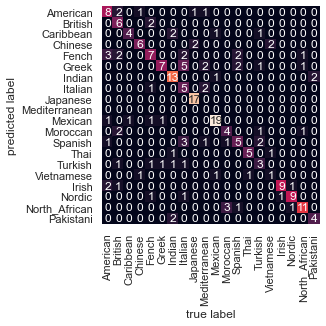

In [344]:
from sklearn.metrics import confusion_matrix
import seaborn as sns; sns.set()


mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=cuisines_lst_map, yticklabels=cuisines_lst_map)

plt.xlabel('true label')
plt.ylabel('predicted label')
plt.savefig('svm_confusion_matric.png');